# 🦠 Análise de Casos de Dengue

- Este projeto tem como objetivo analisar os casos de dengue reportados em Curitiba-PR, a partir de dados abertos fornecidos pela Prefeitura de curitiba. Serão investigadas tendências temporais, padrões geográficos, evolução dos casos, e outros insights que ajudem a entender o comportamento da doença.


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tratamento do DataFrame

In [39]:
# estou importando a base que sera utilizada na analise

df = pd.read_csv('dengue_dados_abertos_-_Base_de_Dados.csv',encoding='latin1',sep=';')

In [71]:
# com o head estou trazendo todas as colunas com 5 linhas 

df.head(5)

,DATA DA NOTIFICAÇÃO,DATA DOS PRIMEIROS SINTOMAS,BAIRRO DE RESIDÊNCIA,SEXO,IDADE (anos),CRITÉRIO DE CONFIRMAÇÃO,LOCAL DE INFECÇÃO,EVOLUÇÃO,TEMPO_NOTIFICACAO,faixa_etaria
0,2024-01-01,2024-01-01,XAXIM,M,43.0,laboratorial,Importado,Cura,0 days,36-45
1,2024-01-02,2024-01-01,ALTO BOQUEIRÃO,F,35.0,laboratorial,Importado,Cura,1 days,36-45
2,2024-01-03,2024-01-03,XAXIM,M,16.0,laboratorial,Importado,Cura,0 days,0-18
3,2024-01-03,2024-01-03,XAXIM,M,10.0,laboratorial,Importado,Cura,0 days,0-18
4,2024-01-03,2024-01-01,FAZENDINHA,F,18.0,laboratorial,Importado,Cura,2 days,19-25


In [40]:
df['CRITÉRIO DE CONFIRMAÇÃO'] = df['CRITÉRIO DE CONFIRMAÇÃO'].replace({
                                                                        'clínico epidemiológico': 'Clínico Epidemiológico',
                                                                        'em investigação' : 'Em investigação',
                                                                        'Laboratório' : 'laboratorial'})

In [41]:
df['EVOLUÇÃO'] = df['EVOLUÇÃO'].replace({
    'cura' : 'Cura',
    'ignorado' : 'Ignorado'
})

In [69]:
df.isnull().sum()

DATA DA NOTIFICAÇÃO            0
DATA DOS PRIMEIROS SINTOMAS    0
BAIRRO DE RESIDÊNCIA           0
SEXO                           0
IDADE (anos)                   0
CRITÉRIO DE CONFIRMAÇÃO        0
LOCAL DE INFECÇÃO              0
EVOLUÇÃO                       0
TEMPO_NOTIFICACAO              0
faixa_etaria                   0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
# aqui estou convertendo a a coluna de object para datetime

df['DATA DA NOTIFICAÇÃO'] = pd.to_datetime(df['DATA DA NOTIFICAÇÃO'], format='%d/%m/%Y')

In [47]:
# aqui estou convertendo a coluna de object para datetime

df['DATA DOS PRIMEIROS SINTOMAS'] = pd.to_datetime(df['DATA DOS PRIMEIROS SINTOMAS'], format='%d/%m/%Y')

In [49]:
# aqui estou criando uma coluna no meu DataFrame, com a subtração de 2 colunas para saber quantos dias de sintomas

df['TEMPO_NOTIFICACAO'] = df['DATA DA NOTIFICAÇÃO'] - df['DATA DOS PRIMEIROS SINTOMAS']

# 📅 Análise Temporal

- **Tendência de notificações ao longo do tempo** (`DATA DA NOTIFICAÇÃO`)
- Existe sazonalidade? (ex.: aumentos em certos meses do ano)

In [52]:
df = df[df['TEMPO_NOTIFICACAO'] <= pd.Timedelta(days=10)]

In [53]:
import pandas as pd

# Supondo que df esteja carregado com a coluna 'DATA DA NOTIFICAÇÃO'
df['DATA DA NOTIFICAÇÃO'] = pd.to_datetime(df['DATA DA NOTIFICAÇÃO'])

# Cria uma lista com todos os primeiros dias do mês na base
datas_mensais = pd.date_range(start=df['DATA DA NOTIFICAÇÃO'].min().replace(day=1),
                               end=df['DATA DA NOTIFICAÇÃO'].max().replace(day=1),
                               freq='MS')  # MS = Month Start

resultados = []

for inicio in datas_mensais:
    fim = inicio + pd.offsets.MonthEnd(1)
    filtro = (df['DATA DA NOTIFICAÇÃO'] >= inicio) & (df['DATA DA NOTIFICAÇÃO'] <= fim)
    quantidade = df[filtro].shape[0]
    resultados.append({
        'ano_mes': inicio.strftime('%Y-%m'),
        'inicio': inicio.date(),
        'fim': fim.date(),
        'quantidade': quantidade
    })

df_resultados = pd.DataFrame(resultados)

# Adiciona a coluna de porcentagem
total_geral = df_resultados['quantidade'].sum()
df_resultados['porcentagem'] = (df_resultados['quantidade'] / total_geral * 100).round(2).astype(str) + ' %'

print(df_resultados)


    ano_mes      inicio         fim  quantidade porcentagem
0   2024-01  2024-01-01  2024-01-31         314      1.83 %
1   2024-02  2024-02-01  2024-02-29         916      5.34 %
2   2024-03  2024-03-01  2024-03-31        2889     16.84 %
3   2024-04  2024-04-01  2024-04-30        5322     31.02 %
4   2024-05  2024-05-01  2024-05-31        5691     33.17 %
5   2024-06  2024-06-01  2024-06-30        1293      7.54 %
6   2024-07  2024-07-01  2024-07-31         301      1.75 %
7   2024-08  2024-08-01  2024-08-31         132      0.77 %
8   2024-09  2024-09-01  2024-09-30          77      0.45 %
9   2024-10  2024-10-01  2024-10-31          82      0.48 %
10  2024-11  2024-11-01  2024-11-30          53      0.31 %
11  2024-12  2024-12-01  2024-12-31          89      0.52 %


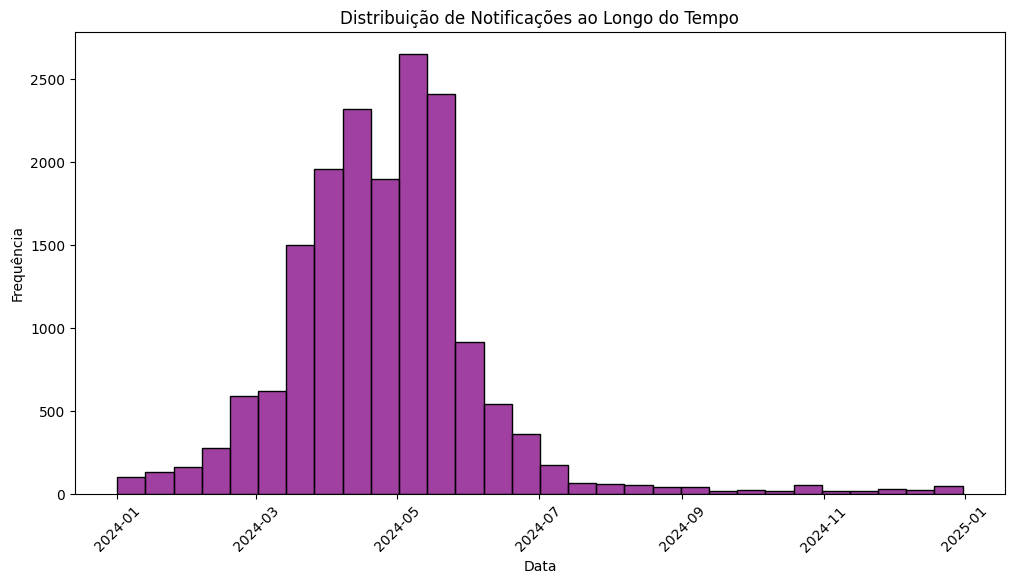

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='DATA DA NOTIFICAÇÃO', bins=30, color='purple')
plt.title('Distribuição de Notificações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


In [55]:
df[(df['DATA DA NOTIFICAÇÃO'].dt.year == 2024) & (df['DATA DA NOTIFICAÇÃO'].dt.month == 1)]

,DATA DA NOTIFICAÇÃO,DATA DOS PRIMEIROS SINTOMAS,BAIRRO DE RESIDÊNCIA,SEXO,IDADE (anos),CRITÉRIO DE CONFIRMAÇÃO,LOCAL DE INFECÇÃO,EVOLUÇÃO,TEMPO_NOTIFICACAO
0,2024-01-01,2024-01-01,XAXIM,M,43.0,laboratorial,Importado,Cura,0 days
1,2024-01-02,2024-01-01,ALTO BOQUEIRÃO,F,35.0,laboratorial,Importado,Cura,1 days
2,2024-01-03,2024-01-03,XAXIM,M,16.0,laboratorial,Importado,Cura,0 days
3,2024-01-03,2024-01-03,XAXIM,M,10.0,laboratorial,Importado,Cura,0 days
4,2024-01-03,2024-01-01,FAZENDINHA,F,18.0,laboratorial,Importado,Cura,2 days
...,...,...,...,...,...,...,...,...,...
320,2024-01-31,2024-01-30,SÍTIO CERCADO,F,44.0,laboratorial,Importado,Cura,1 days
321,2024-01-31,2024-01-24,CIDADE INDUSTRIAL DE CURITIBA,M,8.0,laboratorial,Importado,Cura,7 days
322,2024-01-31,2024-01-27,BUTIATUVINHA,F,52.0,laboratorial,Importado,Cura,4 days
323,2024-01-31,2024-01-31,CAMPO DE SANTANA,M,16.0,laboratorial,Importado,Cura,0 days


- **Diferença entre data dos primeiros sintomas e data da notificação**
- Tempo médio até a notificação (indicador de agilidade do sistema)

# 🌍 Análise Geográfica

- Distribuição dos casos por `BAIRRO DE RESIDÊNCIA`
 - Quais bairros concentram mais casos?

In [60]:
contagem_bairros = df['BAIRRO DE RESIDÊNCIA'].value_counts().sort_index()
porcentagem_bairros = df['BAIRRO DE RESIDÊNCIA'].value_counts(normalize=True).sort_index() * 100

distribuicao_bairros = pd.DataFrame({
    'QTD': contagem_bairros,
    'QTD_Porcentagem': porcentagem_bairros.round(2)
})

distribuicao_bairros = (
    df['BAIRRO DE RESIDÊNCIA']
    .value_counts(normalize=False)
    .to_frame(name='QTD')
    .assign(
        QTD_Porcentagem=lambda x: (x['QTD'] / x['QTD'].sum() * 100).round(2).astype(str) + ' %'
    )
    .sort_values(by='QTD', ascending=False)
    .head(25)
    .reset_index()
    .rename(columns={'index': 'BAIRRO DE RESIDÊNCIA'})
)

print(distribuicao_bairros)


             BAIRRO DE RESIDÊNCIA   QTD QTD_Porcentagem
0   CIDADE INDUSTRIAL DE CURITIBA  2981         17.37 %
1                          CAJURU  2124         12.38 %
2                       TATUQUARA  1835         10.69 %
3                   SÍTIO CERCADO  1484          8.65 %
4                CAMPO DE SANTANA   994          5.79 %
5                     BAIRRO ALTO   877          5.11 %
6                  ALTO BOQUEIRÃO   847          4.94 %
7                       BOQUEIRÃO   575          3.35 %
8                           ATUBA   535          3.12 %
9                      FAZENDINHA   438          2.55 %
10                        UBERABA   417          2.43 %
11                          XAXIM   328          1.91 %
12                    PINHEIRINHO   289          1.68 %
13                  SANTA CÂNDIDA   274           1.6 %
14                     NOVO MUNDO   228          1.33 %
15                CAPÃO DA IMBUIA   173          1.01 %
16                      BOA VISTA   154         

# 👤 **Análise Demográfica**


- Distribuição por `SEXO`
- Há diferença na incidência entre homens e mulheres?


In [61]:
#Distribuição de pacientes por sexo.
porc_sexo = df['SEXO'].value_counts(normalize=True) * 100
porc_sexo

SEXO
F    52.252462
M    47.747538
Name: proportion, dtype: float64

- **Faixa etária (`IDADE (anos)`)**
  - Quais faixas etárias são mais afetadas?

In [62]:
# Distribuição etária (faixa etária ou idade média) e sexo
bins = [0, 18, 25, 35, 45, 60, 80, 90, 100] #faixas etarias
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '61-80', '81-90', '91-100']

df['faixa_etaria'] = pd.cut(df['IDADE (anos)'], bins=bins, labels=labels, right=False)

# Contagem absoluta
contagem = df['faixa_etaria'].value_counts().sort_index()

# Porcentagem
porcentagem = (df['faixa_etaria'].value_counts(normalize=True).sort_index() * 100).round(2).astype(str) + ' %'

# Juntando os dois em um DataFrame
distribuicao_final = pd.DataFrame({
    'Quantidade': contagem,
    'Porcentagem (%)': porcentagem.round(2)
})

print(distribuicao_final)

              Quantidade Porcentagem (%)
faixa_etaria                            
0-18                2656         15.48 %
19-25               2215         12.91 %
26-35               3198         18.64 %
36-45               2851         16.62 %
46-60               3653         21.29 %
61-80               2375         13.84 %
81-90                189           1.1 %
91-100                22          0.13 %


# 🧪 Análise de Diagnóstico
- Tipos de confirmação (`CRITÉRIO DE CONFIRMAÇÃO`)

- Qual o percentual de confirmações

In [63]:
contagem_criterio = df['CRITÉRIO DE CONFIRMAÇÃO'].value_counts().sort_index()
porcentagem_criterio = df['CRITÉRIO DE CONFIRMAÇÃO'].value_counts(normalize=True).sort_index() * 100

criterio_confirmacao = pd.DataFrame({
    'QTD': contagem_criterio,
    'QTD_Porcentagem': porcentagem_criterio.round(2)
})

criterio_confirmacao = (
    df['CRITÉRIO DE CONFIRMAÇÃO']
    .value_counts(normalize=False)
    .to_frame(name='QTD')
    .assign(
        QTD_Porcentagem=lambda x: (x['QTD'] / x['QTD'].sum() * 100).round(2).astype(str) + ' %'
    )
    .sort_values(by='QTD', ascending=False)
    .head(25)
    .reset_index()
    .rename(columns={'index': 'Bairro'})
)

print(criterio_confirmacao)


  CRITÉRIO DE CONFIRMAÇÃO    QTD QTD_Porcentagem
0            laboratorial  12509          72.9 %
1  Clínico Epidemiológico   4650          27.1 %


- Quantos casos ainda estão "em investigação"?

# 🌐 **Origem da Infecção**

- **Proporção de casos autóctones x importados (`LOCAL DE INFECÇÃO`)**
  - Indica se a doença está circulando localmente ou sendo trazida de fora

In [64]:
contagem_local_infeccao = df['LOCAL DE INFECÇÃO'].value_counts().sort_index()
porcentagem_local_infeccao = df['LOCAL DE INFECÇÃO'].value_counts(normalize=True).sort_index() * 100

local_infeccao = pd.DataFrame({
    'QTD': contagem_local_infeccao,
    'QTD_Porcentagem': porcentagem_local_infeccao.round(2)
})

local_infeccao = (
    df['LOCAL DE INFECÇÃO']
    .value_counts(normalize=False)
    .to_frame(name='QTD')
    .assign(
        QTD_Porcentagem=lambda x: (x['QTD'] / x['QTD'].sum() * 100).round(2).astype(str) + ' %'
    )
    .sort_values(by='QTD', ascending=False)
    .head(25)
    .reset_index()
    .rename(columns={'index': 'Bairro'})
)

print(local_infeccao)


  LOCAL DE INFECÇÃO    QTD QTD_Porcentagem
0         Autóctone  12234          71.3 %
1         Importado   4925          28.7 %


# 💡 Análise de Desfecho Clínico


- **Desfecho dos casos (`EVOLUÇÃO`)**


  - Percentual de cura, óbitos e casos em investigação


In [65]:
contagem_evolucao = df['EVOLUÇÃO'].value_counts().sort_index()
porcentagem_evolucao = df['EVOLUÇÃO'].value_counts(normalize=True).sort_index() * 100

evolucao = pd.DataFrame({
    'QTD': contagem_evolucao,
    'QTD_Porcentagem': porcentagem_evolucao.round(2)
})

evolucao = (
    df['EVOLUÇÃO']
    .value_counts(normalize=False)
    .to_frame(name='QTD')
    .assign(
        QTD_Porcentagem=lambda x: (x['QTD'] / x['QTD'].sum() * 100).round(2).astype(str) + ' %'
    )
    .sort_values(by='QTD', ascending=False)
    .head(25)
    .reset_index()
    .rename(columns={'index': 'Bairro'})
)

print(evolucao)


                  EVOLUÇÃO    QTD QTD_Porcentagem
0                     Cura  17129         99.83 %
1           Sem informação     15          0.09 %
2        óbito pelo agravo      6          0.03 %
3  óbito por outras causas      5          0.03 %
4                 Ignorado      4          0.02 %


In [66]:
valores = df.loc[df['EVOLUÇÃO'] == 'óbito por outras causas'].shape[0]
print(valores)

5


# 🧩 Combinação de variáveis (Insights cruzados)

- Existe associação entre bairro e tipo de infecção (autóctone/importado)?

In [77]:
# Agrupando por Bairro e Critério
grupo_bairro_criterio_2 = (
    df.groupby(['BAIRRO DE RESIDÊNCIA', 'LOCAL DE INFECÇÃO'])
    .size()
    .reset_index(name='QTD')
)

# Calculando a porcentagem dentro de cada bairro
grupo_bairro_criterio_2['QTD_Porcentagem'] = (
    grupo_bairro_criterio_2
    .groupby('BAIRRO DE RESIDÊNCIA')['QTD']
    .transform(lambda x: (x / x.sum() * 100).round(2).astype(str) + ' %')
)

# Pegando apenas o critério com maior QTD por bairro
maior_criterio_por_bairro_2 = grupo_bairro_criterio_2.loc[
    grupo_bairro_criterio_2.groupby('BAIRRO DE RESIDÊNCIA')['QTD'].idxmax()
].sort_values(by='QTD', ascending=False)

# Exibindo o resultado
print(maior_criterio_por_bairro_2)

              BAIRRO DE RESIDÊNCIA LOCAL DE INFECÇÃO   QTD QTD_Porcentagem
55   CIDADE INDUSTRIAL DE CURITIBA         Autóctone  2424         81.31 %
131                      TATUQUARA         Autóctone  1669         90.95 %
36                          CAJURU         Autóctone  1401         65.96 %
41                CAMPO DE SANTANA         Autóctone   910         91.55 %
125                  SÍTIO CERCADO         Autóctone   910         61.32 %
..                             ...               ...   ...             ...
82                 LAMENHA PEQUENA         Importado     4          80.0 %
124                     SÃO MIGUEL         Autóctone     3         100.0 %
127                         TABOÃO         Autóctone     3          60.0 %
72                      HUGO LANGE         Importado     2         66.67 %
105                        RIVIERA         Importado     2         100.0 %

[75 rows x 4 columns]


- Existe associação entre bairro e tipo de infecção (laboratorial/Clínico Epidemiológico)?

In [67]:
# Agrupando por Bairro e Critério
grupo_bairro_criterio = (
    df.groupby(['BAIRRO DE RESIDÊNCIA', 'CRITÉRIO DE CONFIRMAÇÃO'])
    .size()
    .reset_index(name='QTD')
)

# Calculando a porcentagem dentro de cada bairro
grupo_bairro_criterio['QTD_Porcentagem'] = (
    grupo_bairro_criterio
    .groupby('BAIRRO DE RESIDÊNCIA')['QTD']
    .transform(lambda x: (x / x.sum() * 100).round(2).astype(str) + ' %')
)

# Pegando apenas o critério com maior QTD por bairro
maior_criterio_por_bairro = grupo_bairro_criterio.loc[
    grupo_bairro_criterio.groupby('BAIRRO DE RESIDÊNCIA')['QTD'].idxmax()
].sort_values(by='QTD', ascending=False)

# Exibindo o resultado
print(maior_criterio_por_bairro)



              BAIRRO DE RESIDÊNCIA CRITÉRIO DE CONFIRMAÇÃO   QTD  \
36                          CAJURU            laboratorial  2072   
54   CIDADE INDUSTRIAL DE CURITIBA  Clínico Epidemiológico  1535   
119                  SÍTIO CERCADO            laboratorial  1332   
124                      TATUQUARA            laboratorial   928   
16                     BAIRRO ALTO            laboratorial   723   
..                             ...                     ...   ...   
76                 LAMENHA PEQUENA            laboratorial     5   
113                       SÃO JOÃO            laboratorial     5   
70                      HUGO LANGE            laboratorial     3   
97                         RIVIERA            laboratorial     2   
116                     SÃO MIGUEL  Clínico Epidemiológico     2   

    QTD_Porcentagem  
36          97.55 %  
54          51.49 %  
119         89.76 %  
124         50.57 %  
16          82.44 %  
..              ...  
76          100.0 %  
113    

- Casos confirmados por critério clínico são mais comuns em uma faixa etária ou sexo específico?